# Flowchart

### 1. Load the images
### 2. Randomly select an image as template image and remove it from the list.
### 3. Perform PCA on template image and extract angle of rotation.
### 4. For each remaining image in the list, perform PCA and extract angle of rotation.
### 5. Rotate the image by the difference of angle of rotation of template image and current image. Do this by obtainig the rotation matrix.
### 6. Select random images and then display them.


In [203]:
# loading the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import os
import cv2
from PIL import Image

In [204]:
# loading the image data
# copying this from PCA starter notebook

opt = {
    'image_size': 64,
    'is_grayscale': True
}

def display_images(imgs, img_name , row=1, col=2, w=32, h=32):
    fig = plt.figure(figsize=(8, 8))
    for i in range(1, col*row + 1):
        img = imgs[i-1]
        fig.add_subplot(row, col, i)

        if opt['is_grayscale']:
            plt.imshow(img, cmap='gray')
        else:
            plt.imshow(img)

        plt.title("Class:{}".format(img_name[i-1]))
        plt.axis('off')
    plt.show()

def load_image(path):
    im = Image.open(path).convert(
        'L' if opt['is_grayscale'] else 'RGB')  # returns the image
    im = im.resize((opt['image_size'], opt['image_size']))
    im = np.array(im)
    im = im/256
    return im

def load_data(dir_path):
    image_list = []
    image_name = []
    if os.path.isdir(dir_path):
        for filename in sorted(os.listdir(dir_path)):
            if filename.endswith(".png"):
                im = load_image(os.path.join(dir_path, filename))
                image_list.append(im)
                y = filename.split('.')[0]
                image_name.append(y)
            else:
                continue
    image_list = np.array(image_list)
    image_name = np.array(image_name)
    return image_list, image_name

In [205]:
# loading the dataset into the notebook
dir_path = "./KIMIA dataset"
image_list, image_name = load_data(dir_path)

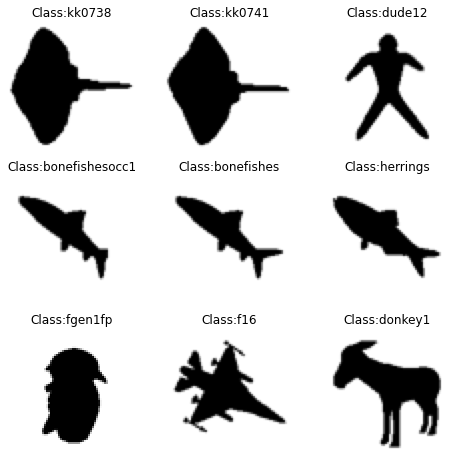

In [206]:
row = 3
col = 3
ind = np.random.randint(0, image_name.shape[0], row*col)  # Randomly select images
# Display images in 2 rows and 3 columns
display_images(image_list[ind, ...], image_name[ind], row, col)

We shall use the following image as template:


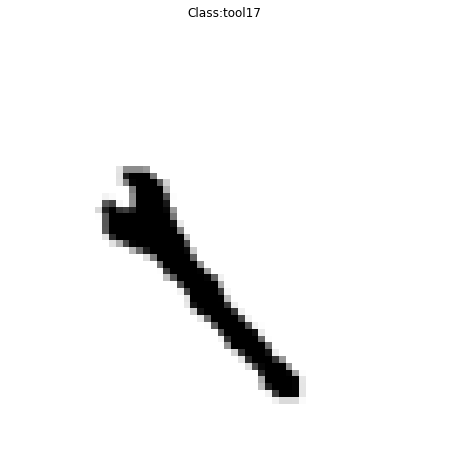

In [207]:
# dividing the image list into template 

template_index = np.random.randint(0, image_name.shape[0], 1)
template_image = image_list[template_index, ...]
template_name = image_name[template_index, ...]

print("We shall use the following image as template:")
display_images(template_image, template_name, 1, 1)

# removing the template image from the image list
image_list = np.delete(image_list, template_index, axis=0)
image_name = np.delete(image_name, template_index, axis=0)


In [208]:
# for template image
# convert the template image into a size of 64,64
template_image = template_image.reshape(64,64)
x_template , y_template = np.where(template_image == 0)

feature_pts_template = np.array([x_template,y_template]).T
pca_template = PCA(n_components=2)
pca_template_feature_pts = pca_template.fit_transform(feature_pts_template)
template_reference = pca_template.components_[0]
angle_template = np.arctan2(template_reference[1],template_reference[0])

In [209]:
aligned_image = []

for image in image_list:
    image = image.reshape(64,64)
    x_image , y_image = np.where(image == 0)
    feature_pts_image = np.array([x_image,y_image]).T
    pca_image = PCA(n_components=2)
    pca_image_feature_pts = pca_image.fit_transform(feature_pts_image)
    image_reference = pca_image.components_[0]
    angle_image = np.arctan2(image_reference[1],image_reference[0])
    angle_difference = angle_template - angle_image
    angle_difference_degree = np.degrees(angle_difference)
    rotation_matrix = cv2.getRotationMatrix2D((opt['image_size']/2 , opt['image_size']/2),angle_difference_degree,1)
    aligned_image.append(cv2.warpAffine(image,rotation_matrix,(opt['image_size'],opt['image_size'])))

aligned_image = np.array(aligned_image)

Original Images:


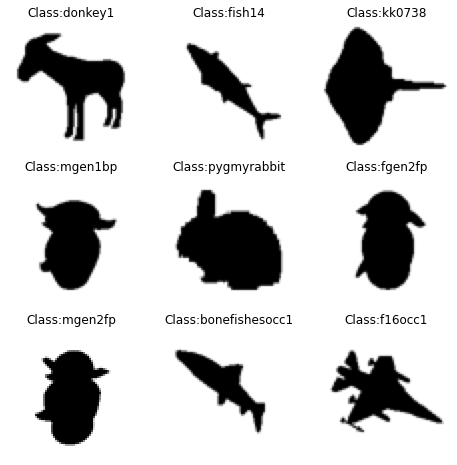

Aligned Images:


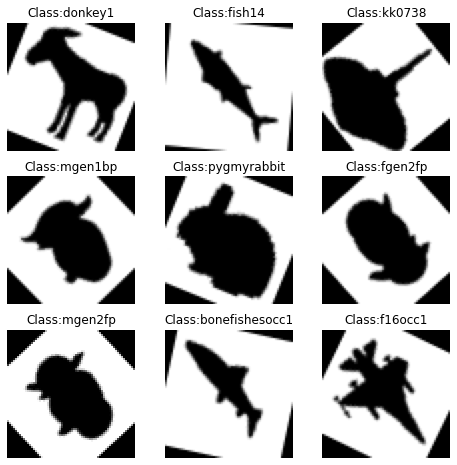

In [210]:
output_index = np.random.randint(0, aligned_image.shape[0], row*col)  # Randomly select images

# # Display images in 2 rows and 3 columns
print("Original Images:")
display_images(image_list[output_index, ...], image_name[output_index], row, col)
print("Aligned Images:")
display_images(aligned_image[output_index, ...], image_name[output_index], row, col)

In [211]:
# Generating music 11
# Movie Genre Prediction 13
# Compression of NTM via pruning 20
# self normalising nn 21
# unsupervised domain adaptation 23
# clickbait  detection 24

# understandinf dl usin 1
# multi class classification 10
# Mix Match 22
# Batch normalization  2

In [212]:
# Unsupervised Domain Adaptation By Backpropogation 23 Khushi
# Compression of Neural Machine Translation Models via Pruning 20 Nitin
# Self Normalizing Neural Networks 21 Khushi
# Clickbait detection and Transfer Learning using Neural Network 24 Naimeeesh
# Understanding Deep Learning Requires Rethinking Generalization 1 Tathagato
# Generating music with Machine Learning 11 Naimeesh
# Movie Genre Prediction based on plot summaries 13 Nachiket
# Multi-class classification of Mental Health Disorders: 10 Kawshik
# How Does Batch Normalization Help Optimization? 2 Tathagato
# MixMatch: A Holistic Approach to Semi-Supervised Learning 22 Khushi
